### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-09-04 06:58:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-09-04 06:58:36 (193 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


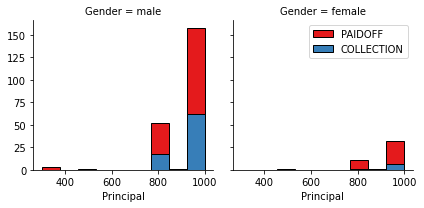

In [7]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

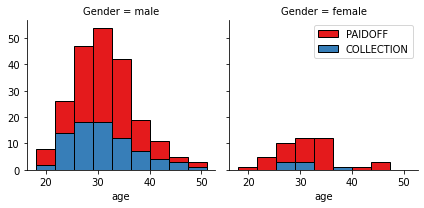

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


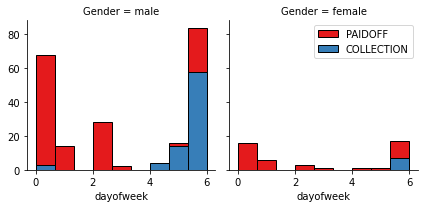

In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [10]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [11]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [12]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding


In [13]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [14]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [15]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [16]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [17]:
y=df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [18]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now using the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression


# K Nearest Neighbor(KNN)




In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=4)
print(x_train.shape)
print(y_train.shape)

(276, 8)
(276,)


In [23]:
from sklearn.model_selection import cross_val_score
acc_score=[]
for i in range(1,40):
    kn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(kn,x_train,y_train,cv=10)
    acc_score.append(score.mean())

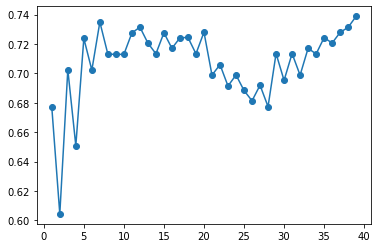

In [26]:
plt.plot(range(1,40),acc_score,marker='o');

In [27]:
#let k=7

kn=KNeighborsClassifier(n_neighbors=7).fit(x_train,y_train)
yht=kn.predict(x_test)
kn.score(x_test,y_test)

0.7857142857142857

In [28]:
from sklearn.metrics import accuracy_score,classification_report,jaccard_score,f1_score
accuracy_score(y_test,yht)

0.7857142857142857

In [29]:
f1_score(y_test,yht,average='weighted')

0.7766540244416351

In [30]:
jaccard_score(y_test,yht,average='weighted')

0.6627869897959183

In [31]:
print(classification_report(y_test,yht))

              precision    recall  f1-score   support

  COLLECTION       0.50      0.40      0.44        15
     PAIDOFF       0.84      0.89      0.87        55

    accuracy                           0.79        70
   macro avg       0.67      0.65      0.66        70
weighted avg       0.77      0.79      0.78        70



# Decision Tree


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [42]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [43]:
data=df[['terms','age','education','Gender','dayofweek','weekend']]
data.head()

,terms,age,education,Gender,dayofweek,weekend
0,30,45,High School or Below,0,3,0
1,30,33,Bechalor,1,3,0
2,15,27,college,0,3,0
3,30,28,college,1,4,1
4,30,29,college,0,4,1


In [48]:
edu = LabelEncoder()
tr = LabelEncoder()
data['education'] = edu.fit_transform(data['education'])
data['terms'] = tr.fit_transform(data['terms'])
data.head()

<ipython-input-48-b35b0c19ac6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education'] = edu.fit_transform(data['education'])
<ipython-input-48-b35b0c19ac6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['terms'] = tr.fit_transform(data['terms'])


,terms,age,education,Gender,dayofweek,weekend
0,2,45,1,0,3,0
1,2,33,0,1,3,0
2,1,27,3,0,3,0
3,2,28,3,1,4,1
4,2,29,3,0,4,1


In [49]:
x=data.values
x[0:5]

array([[ 2, 45,  1,  0,  3,  0],
       [ 2, 33,  0,  1,  3,  0],
       [ 1, 27,  3,  0,  3,  0],
       [ 2, 28,  3,  1,  4,  1],
       [ 2, 29,  3,  0,  4,  1]])

In [50]:
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [56]:
model=DecisionTreeClassifier(criterion='entropy', max_depth = 3).fit(x_train,y_train)
yht=model.predict(x_test)

In [58]:
from sklearn import metrics 
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yht))

DecisionTrees's Accuracy:  0.8365384615384616


### Post Pruning

In [59]:
path = model.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
ccp_alphas

array([0.        , 0.00752697, 0.01122448, 0.01663512, 0.02172824,
       0.17673165])

In [63]:
models=[]
model_train=[]
for alpha in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha=alpha,random_state=0)
    dt.fit(x_train,y_train)
    models.append(dt.score(x_test,y_test))
    model_train.append(dt.score(x_train,y_train))
models,model_train

([0.7307692307692307,
  0.8365384615384616,
  0.8365384615384616,
  0.8365384615384616,
  0.8365384615384616,
  0.8365384615384616],
 [0.9297520661157025,
  0.7148760330578512,
  0.7148760330578512,
  0.7148760330578512,
  0.7148760330578512,
  0.7148760330578512])

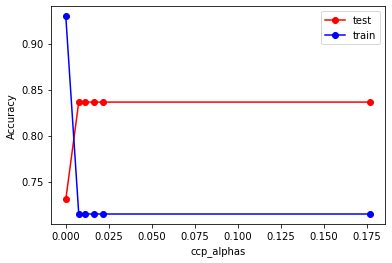

In [71]:
plt.plot(ccp_alphas,models,marker='o',color='r',label='test')
plt.plot(ccp_alphas,model_train,marker='o',color='b',label='train')
plt.xlabel('ccp_alphas')
plt.ylabel('Accuracy')
plt.legend();

In [67]:
print(metrics.classification_report(y_test,yht))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        17
     PAIDOFF       0.84      1.00      0.91        87

    accuracy                           0.84       104
   macro avg       0.42      0.50      0.46       104
weighted avg       0.70      0.84      0.76       104



/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
metrics.f1_score(y_test,yht,average='weighted')

0.7620821586790173

In [69]:
metrics.jaccard_score(y_test,yht,average='weighted')

0.6997965976331362

# Support Vector Machine


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   terms      346 non-null    int64
 1   age        346 non-null    int64
 2   education  346 non-null    int64
 3   Gender     346 non-null    int64
 4   dayofweek  346 non-null    int64
 5   weekend    346 non-null    int64
dtypes: int64(6)
memory usage: 16.3 KB


In [73]:
ndf=df.copy()
ndf['loan_status']=ndf['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,2])
y=np.asarray(ndf['loan_status']).astype('int')
y[0:5]

array([1, 1, 1, 1, 1])

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score,jaccard_score,confusion_matrix

In [76]:
modelsvm=SVC(kernel='rbf')
modelsvm.fit(x_train,y_train)
yht=modelsvm.predict(x_test)
yht[0:5]

array([1, 1, 1, 1, 1])

In [77]:
f1_score(y_test,yht)

0.88

In [78]:
jaccard_score(y_test,yht)

0.7857142857142857

# Logistic Regression


In [79]:
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [80]:
y[0:5]

array([1, 1, 1, 1, 1])

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=4)

In [83]:
lr=LogisticRegression(C=0.01,solver='saga').fit(x_train,y_train)
yht=lr.predict(x_test)
lr.score(x_test,y_test)

0.8571428571428571

In [84]:
y_prob=lr.predict_proba(x_test)
y_prob[0:5]

array([[0.64348376, 0.35651624],
       [0.70633909, 0.29366091],
       [0.82443893, 0.17556107],
       [0.81501443, 0.18498557],
       [0.82136275, 0.17863725]])

In [85]:
from sklearn.metrics import f1_score,jaccard_score,log_loss,classification_report

In [86]:
print("f1 score : ",f1_score(y_test,yht))
print("jaccard : ",jaccard_score(y_test,yht))
print("log loss : ",log_loss(y_test,y_prob))

f1 score :  0.923076923076923
jaccard :  0.8571428571428571
log loss :  0.4390056217520627


In [87]:
print(classification_report(y_test,yht))

              precision    recall  f1-score   support

           1       0.86      1.00      0.92        30
           2       0.00      0.00      0.00         5

    accuracy                           0.86        35
   macro avg       0.43      0.50      0.46        35
weighted avg       0.73      0.86      0.79        35



/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Report

KNN
* f1_score - 0.7766540244416351
* jaccard_score - 0.6627869897959183

DecisionTreeClassifier
* f1_score - 0.7620821586790173
* jaccard_score - 0.699

SVM
* f1_score - 0.88
* jaccard_score - 0.7857142857142857

LogisticRegression
* f1 score - 0.923076923076923
* jaccard - 0.8571428571428571
* log loss - 0.4390049401025512
